In [1]:
import pandas as pd

In [2]:
pd.read_csv(r"D:\codes\covid data\india\case_time_series.csv")

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
636,27 October 2021,2021-10-27,16351,34231030,17077,33606620,734,455828
637,28 October 2021,2021-10-28,14307,34245337,13189,33619809,805,456633
638,29 October 2021,2021-10-29,14215,34259552,13549,33633358,551,457184
639,30 October 2021,2021-10-30,12940,34272492,14672,33648030,445,457629


In [3]:
st=pd.read_csv(r"D:\codes\covid data\india\state_wise_daily.csv")

In [4]:
st.rename(columns={'AP':'Andhra Pradesh','AR':'Arunachal Pradesh','AS':'Assam','BR':'Bihar','AN':'Andaman and Nicobar','CH':'Chandigarh','CT':'Chhattisgarh','DN':'Dadra and Nagar Haveli','DD':'Daman and Diu','DL':'Delhi','GA':'Goa','GJ':'Gujarat','HR':'Haryana','HP':'Himachal Pradesh','JH':'Jharkhand','JK':'Jammu and Kashmir','KA':'Karnataka','KL':'Kerala','LD':'Lakshadweep','MP':'Madhya Pradesh','MH':'Maharastra','MN':'Manipur','ML':'Meghalaya','MZ':'Mizoram','NL':'Nagaland','OR':'Orissa','PY':'Pondicherry','PB':'Punjab','RJ':'Rajasthan','SK':'Sikkim','TN':'Tamil Nadu','TR':'Tripura','TG':'Telangana','UP':'Uttar Pradesh','UT':'Uttarakhand','WB':'West Bengal'},inplace=True)
st.drop(['TT','UN','LA'],axis=1,inplace=True)

In [5]:
st.head()

,Date,Date_YMD,Status,Andaman and Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,14-Mar-20,2020-03-14,Confirmed,0,1,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,2020-03-14,Recovered,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,2020-03-14,Deceased,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,2020-03-15,Recovered,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [6]:
State_wise= pd.melt(st, id_vars=['Date', 'Date_YMD', 'Status'], var_name=['States'])
print("The Shape of st is: ", st.shape)

The Shape of st is:  (1791, 39)


In [7]:
State_wise

,Date,Date_YMD,Status,States,value
0,14-Mar-20,2020-03-14,Confirmed,Andaman and Nicobar,0
1,14-Mar-20,2020-03-14,Recovered,Andaman and Nicobar,0
2,14-Mar-20,2020-03-14,Deceased,Andaman and Nicobar,0
3,15-Mar-20,2020-03-15,Confirmed,Andaman and Nicobar,0
4,15-Mar-20,2020-03-15,Recovered,Andaman and Nicobar,0
...,...,...,...,...,...
64471,30-Oct-21,2021-10-30,Recovered,West Bengal,880
64472,30-Oct-21,2021-10-30,Deceased,West Bengal,13
64473,31-Oct-21,2021-10-31,Confirmed,West Bengal,914
64474,31-Oct-21,2021-10-31,Recovered,West Bengal,913


In [8]:
#State_wise.to_csv('State_wise.csv')

In [9]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#State_wise['Status'] = label_encoder.fit_transform(State_wise['Status'])
#State_wise

In [10]:
#label_encoder.classes_

In [11]:
#State_wise

In [12]:
X = State_wise['Status'].values.reshape(-1,1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
X = onehot_encoder.fit_transform(X).toarray()
X

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [14]:
onehot_encoder.categories_

[array(['Confirmed', 'Deceased', 'Recovered'], dtype=object)]

In [15]:
st_onehot = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
st_onehot

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
64471,0.0,0.0,1.0
64472,0.0,1.0,0.0
64473,1.0,0.0,0.0
64474,0.0,0.0,1.0


In [16]:
st= pd.concat([st_onehot, State_wise], axis=1)
st

,0,1,2,Date,Date_YMD,Status,States,value
0,1.0,0.0,0.0,14-Mar-20,2020-03-14,Confirmed,Andaman and Nicobar,0
1,0.0,0.0,1.0,14-Mar-20,2020-03-14,Recovered,Andaman and Nicobar,0
2,0.0,1.0,0.0,14-Mar-20,2020-03-14,Deceased,Andaman and Nicobar,0
3,1.0,0.0,0.0,15-Mar-20,2020-03-15,Confirmed,Andaman and Nicobar,0
4,0.0,0.0,1.0,15-Mar-20,2020-03-15,Recovered,Andaman and Nicobar,0
...,...,...,...,...,...,...,...,...
64471,0.0,0.0,1.0,30-Oct-21,2021-10-30,Recovered,West Bengal,880
64472,0.0,1.0,0.0,30-Oct-21,2021-10-30,Deceased,West Bengal,13
64473,1.0,0.0,0.0,31-Oct-21,2021-10-31,Confirmed,West Bengal,914
64474,0.0,0.0,1.0,31-Oct-21,2021-10-31,Recovered,West Bengal,913


In [17]:
#State_wise2 = st.drop(['Status'], axis=1)
#State_wise2


In [18]:
st.rename(columns={'0':'Confiremed','1':'Deceased','2':'Recovered'},inplace=True)

In [19]:
st

,Confiremed,Deceased,Recovered,Date,Date_YMD,Status,States,value
0,1.0,0.0,0.0,14-Mar-20,2020-03-14,Confirmed,Andaman and Nicobar,0
1,0.0,0.0,1.0,14-Mar-20,2020-03-14,Recovered,Andaman and Nicobar,0
2,0.0,1.0,0.0,14-Mar-20,2020-03-14,Deceased,Andaman and Nicobar,0
3,1.0,0.0,0.0,15-Mar-20,2020-03-15,Confirmed,Andaman and Nicobar,0
4,0.0,0.0,1.0,15-Mar-20,2020-03-15,Recovered,Andaman and Nicobar,0
...,...,...,...,...,...,...,...,...
64471,0.0,0.0,1.0,30-Oct-21,2021-10-30,Recovered,West Bengal,880
64472,0.0,1.0,0.0,30-Oct-21,2021-10-30,Deceased,West Bengal,13
64473,1.0,0.0,0.0,31-Oct-21,2021-10-31,Confirmed,West Bengal,914
64474,0.0,0.0,1.0,31-Oct-21,2021-10-31,Recovered,West Bengal,913


<AxesSubplot:>

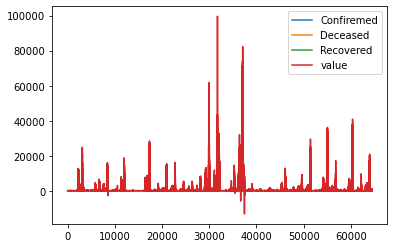

In [20]:
st.plot()

In [21]:
import matplotlib as plt
import os

In [22]:
st['Confiremed']=st.apply(lambda x:x['value']if x['Confiremed']==1 else x['Confiremed'],axis=1)
st['Deceased']=st.apply(lambda x:x['value']if x['Deceased']==1 else x['Deceased'],axis=1)
st['Recovered']=st.apply(lambda x:x['value']if x['Recovered']==1 else x['Recovered'],axis=1)
st.tail()

,Confiremed,Deceased,Recovered,Date,Date_YMD,Status,States,value
64471,0.0,0.0,880.0,30-Oct-21,2021-10-30,Recovered,West Bengal,880
64472,0.0,13.0,0.0,30-Oct-21,2021-10-30,Deceased,West Bengal,13
64473,914.0,0.0,0.0,31-Oct-21,2021-10-31,Confirmed,West Bengal,914
64474,0.0,0.0,913.0,31-Oct-21,2021-10-31,Recovered,West Bengal,913
64475,0.0,15.0,0.0,31-Oct-21,2021-10-31,Deceased,West Bengal,15


In [23]:
#st.sort_values("Date", inplace=True)
#st

In [24]:
#st.drop_duplicates(subset ="Date",
                     #keep = False, inplace = True)


In [25]:
st.drop(['Status'],axis=1,inplace=True)


In [26]:
st

,Confiremed,Deceased,Recovered,Date,Date_YMD,States,value
0,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0
1,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0
2,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0
3,0.0,0.0,0.0,15-Mar-20,2020-03-15,Andaman and Nicobar,0
4,0.0,0.0,0.0,15-Mar-20,2020-03-15,Andaman and Nicobar,0
...,...,...,...,...,...,...,...
64471,0.0,0.0,880.0,30-Oct-21,2021-10-30,West Bengal,880
64472,0.0,13.0,0.0,30-Oct-21,2021-10-30,West Bengal,13
64473,914.0,0.0,0.0,31-Oct-21,2021-10-31,West Bengal,914
64474,0.0,0.0,913.0,31-Oct-21,2021-10-31,West Bengal,913


In [27]:
st['Date_YMD'] = pd.to_datetime(st['Date_YMD'])

In [28]:
st['Month-Year'] = st['Date_YMD'].dt.strftime('%b-%Y')

In [29]:
st

,Confiremed,Deceased,Recovered,Date,Date_YMD,States,value,Month-Year
0,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0,Mar-2020
1,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0,Mar-2020
2,0.0,0.0,0.0,14-Mar-20,2020-03-14,Andaman and Nicobar,0,Mar-2020
3,0.0,0.0,0.0,15-Mar-20,2020-03-15,Andaman and Nicobar,0,Mar-2020
4,0.0,0.0,0.0,15-Mar-20,2020-03-15,Andaman and Nicobar,0,Mar-2020
...,...,...,...,...,...,...,...,...
64471,0.0,0.0,880.0,30-Oct-21,2021-10-30,West Bengal,880,Oct-2021
64472,0.0,13.0,0.0,30-Oct-21,2021-10-30,West Bengal,13,Oct-2021
64473,914.0,0.0,0.0,31-Oct-21,2021-10-31,West Bengal,914,Oct-2021
64474,0.0,0.0,913.0,31-Oct-21,2021-10-31,West Bengal,913,Oct-2021


In [30]:
path = "D:\codes\covid data\india"
# Changing my CWD
os.chdir(path)

st.to_csv('statewise PowerBI Raw', sep='\t')

In [31]:
#st['Date'] = pd.to_datetime(st['Date']).dt.date
#st=st.groupby(st['Date']).last()


In [32]:
#st.tail()